[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [4]:
font_family = get_font_family()

In [5]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# 그래프 스타일 설정
plt.style.use('ggplot')

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats


<function IPython.core.display.set_matplotlib_formats(*formats, **kwargs)>

<AxesSubplot:title={'center':'한글'}>

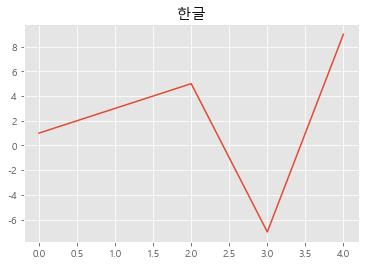

In [9]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title='한글')

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35

In [10]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"
# 자동차 
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273'
url

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273'

In [23]:
# read_html을 통해 해당 업종/테마를 수집합니다.
# table

table = pd.read_html(url, encoding='cp949')
len(table)


업종명    전일대비 전일대비 등락현황                등락그래프
   업종명    전일대비        전체   상승   보합   하락 등락그래프
0  자동차  -0.48%       8.0  2.0  2.0  4.0   14%
1  NaN     NaN       NaN  NaN  NaN  NaN   NaN
2  NaN     NaN       NaN  NaN  NaN  NaN   NaN

In [27]:
## table[0],table[1], table[2] : table이 총 3개임
## 즉, table의 길이가 3

table[0].shape

(3, 7)

In [32]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
# raw
# 3개의 row, 3개의 column이 제거되었습니다.

raw = table[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
raw.shape

(8, 9)

## 파생변수 만들기

In [34]:
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0
2,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0
3,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0
5,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0


In [35]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime

# today
# 참고 : https://godoftyping.wordpress.com/2015/04/19/python-%EB%82%A0%EC%A7%9C-%EC%8B%9C%EA%B0%84%EA%B4%80%EB%A0%A8-%EB%AA%A8%EB%93%88/
# !! 지금 현재의 날짜와 시간을 문자열로 출력하려면 strftime 메서드를 이용하면 된다.

today = datetime.datetime.today().strftime('%Y-%m-%d')


In [36]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
# raw["조회일자"]
raw['조회일자'] = today

In [37]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29
2,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29
3,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29
5,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

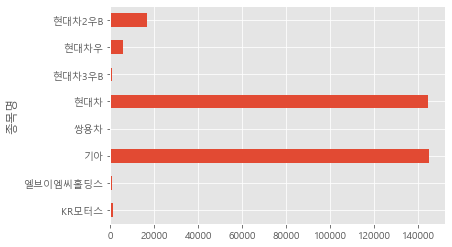

In [40]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
# temp

raw.set_index("종목명")['거래대금'].plot.barh()

In [ ]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
# temp


## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [42]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
# raw["종목명_전처리"]
# 자동차업종은 코스피가 대부분임. 다른 업종은 코스닥도 있음 -> 여기서는 할 필요없음

raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29
2,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29
3,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29
5,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29
6,현대차3우B,110000.0,1500.0,-1.35%,109500.0,110000.0,9078.0,999.0,14522.0,2021-06-29
7,현대차우,115500.0,2000.0,-1.70%,115500.0,116000.0,48721.0,5675.0,49940.0,2021-06-29
8,현대차2우B,115000.0,2500.0,-2.13%,115000.0,115500.0,144100.0,16773.0,63818.0,2021-06-29


In [ ]:
# raw 변수에 담긴 데이터프레임을 확인합니다.


In [45]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.

# df_krx

import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [47]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
# df_item_code_name

df_item_code_name = df_krx[["Symbol", "Name"]]
df_item_code_name.head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [49]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape, df_item_code_name.shape

((8, 10), (7136, 2))

In [50]:
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29
2,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29
3,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29
4,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29
5,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29


In [52]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# '자주 사용하는 왼쪽 데이터를 기준으로 병합하기'
# df
## 참고 : https://mizykk.tistory.com/82
## left_on : 기준열 이름이 다를 때, 왼쪽 기준열

df = raw.merge(df_item_code_name, left_on='종목명', right_on='Name')
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,Symbol,Name
0,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29,000040,KR모터스
1,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29,900140,엘브이엠씨홀딩스
2,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29,000270,기아
3,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29,003620,쌍용차
4,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29,005380,현대차
5,현대차3우B,110000.0,1500.0,-1.35%,109500.0,110000.0,9078.0,999.0,14522.0,2021-06-29,005389,현대차3우B
6,현대차우,115500.0,2000.0,-1.70%,115500.0,116000.0,48721.0,5675.0,49940.0,2021-06-29,005385,현대차우
7,현대차2우B,115000.0,2500.0,-2.13%,115000.0,115500.0,144100.0,16773.0,63818.0,2021-06-29,005387,현대차2우B


In [54]:
# 병합이 잘 되었는지 확인합니다.
df = df.rename(columns = {'Symbol' : '종목코드'})
df = df.drop('Name', axis=1)

In [56]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
0,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29,000040
1,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29,900140
2,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29,000270
3,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29,003620
4,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29,005380


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [57]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "000040"
item_name = "KR모터스"

In [58]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f'https://finance.naver.com/item/main.nhn?code={item_code}'
print(item_url)

https://finance.naver.com/item/main.nhn?code=000040


In [59]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding='cp949')
tables

[                  0                                    1  \
 0  전일  1,215  1,215  고가  1,2601,260  (상한가  1,5751,575  )   
 1    시가  1,2201,220         저가  1,2151,215  (하한가  855  )   
 
                            2  
 0  거래량  1,035,929  1,035,929  
 1     거래대금  1,284  1,284  백만  ,
      매도상위       거래량    매수상위       거개량
 0     NaN       NaN     NaN       NaN
 1    키움증권  306845.0    키움증권  262281.0
 2  NH투자증권  118013.0  미래에셋대우  134589.0
 3      삼성  104917.0  신한금융투자   98791.0
 4    한국증권   94777.0      삼성   84822.0
 5      대신   82367.0    한국증권   83075.0
 6  외국계추정합   11192.0  +7,747   18939.0,
       날짜      종가     전일비       외국인    기관
 0    NaN     NaN     NaN       NaN   NaN
 1  06/29  1255.0  상향  40  +111,238  -6.0
 2  06/28  1215.0   상향  5   +14,772  -8.0
 3  06/25  1210.0  상향  10    +4,094 -10.0
 4  06/24  1200.0  하향  10   +48,742   NaN
 5  06/23  1210.0  하향  45    -62819   NaN
 6  06/22  1255.0  상향  25    +1,204   1.0
 7    NaN     NaN     NaN       NaN   NaN,
        주요재무정보 최근 연간 실적   

In [60]:
# 제대로 수집이 되었는지 확인합니다.
len(tables)

13

In [64]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
tables[3]

주요재무정보 최근 연간 실적                             최근 분기 실적                  \
       주요재무정보  2018.12  2019.12 2020.12 2021.12(E)  2020.03 2020.06 2020.09   
       주요재무정보   IFRS연결   IFRS연결  IFRS연결     IFRS연결   IFRS연결  IFRS연결  IFRS연결   
0         매출액      366     1326    1178        NaN   286.00  312.00  291.00   
1        영업이익     -163     -247      12        NaN     4.00    8.00    1.00   
2       당기순이익     -244     -410    -115        NaN    -9.00   -2.00  -15.00   
3       영업이익률   -44.46   -18.59    1.03        NaN     1.35    2.42    0.34   
4        순이익률   -66.85   -30.96   -9.75        NaN    -2.98   -0.49   -5.02   
5   ROE(지배주주)   -49.31  -113.29  -29.64        NaN  -127.05  -74.95  -70.69   
6        부채비율   121.62   309.20  212.72        NaN   341.08  171.79  171.47   
7        당좌비율    92.73    43.16   53.41        NaN    42.83   55.08   52.58   
8         유보율   -35.08   -86.23  -35.01        NaN   -48.24  -19.74  -22.36   
9      EPS(원)     -755     -855    -107        NaN   -17.00   -7.00  -13.00   
10     PER(배)    -2.15    -1.06  -10.58        NaN    -0.79   -1.09   -1.70   
11     BPS(원)     1117      392     396        NaN   390.00  459.00  453.00   
12     PBR(배)     1.45     2.31    2.86        NaN     1.54    1.45    1.69   
13   주당배당금(원)        -      NaN       -        NaN      NaN     NaN     NaN   
14   시가배당률(%)        -      NaN       -        NaN      NaN     NaN     NaN   
15    배당성향(%)        -        -       -        NaN      NaN     NaN     NaN   

                               
   2020.12 2021.03 2021.06(E)  
    IFRS연결  IFRS연결     IFRS연결  
0      290  227.00        NaN  
1        -   -9.00        NaN  
2      -90  -21.00        NaN  
3    -0.07   -3.94        NaN  
4   -31.13   -9.23        NaN  
5   -29.64  -29.30        NaN  
6   212.72  212.01        NaN  
7    53.41   50.02        NaN  
8   -35.01  -24.60        NaN  
9      -62  -15.00        NaN  
10  -10.58  -13.22        NaN  
11     396  428.00        NaN  
12    2.86    3.07        NaN  
13     NaN     NaN        NaN  
14     NaN     NaN        NaN  
15     NaN     NaN        NaN

## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [65]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [82]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
# finance_info
item_info = []
finance_info = tables[3].iloc[:, [0,-2]]
finance_info.columns = [0,1]
item_info.append(finance_info)

In [83]:
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
             0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN]

In [87]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for i in range(len(tables)):
    if tables[i].shape[1] == 2 : 
        item_info.append(tables[i])

In [88]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
             0       1
 0         매출액  227.00
 1        영업이익   -9.00
 2       당기순이익  -21.00
 3       영업이익률   -3.94
 4        순이익률   -9.23
 5   ROE(지배주주)  -29.30
 6        부채비율  212.01
 7        당좌비율   50.02
 8         유보율  -24.60
 9      EPS(원)  -15.00
 10     PER(배)  -13.22
 11     BPS(원)  428.00
 12     PBR(배)    3.07
 13   주당배당금(원)     NaN
 14   시가배당률(%)     NaN
 15    배당성향(%)     NaN,
           0            1
 0      시가총액    1,207  억원
 1    시가총액순위     코스피 805위
 2     상장주식수     96137368
 3  액면가l매매단위  500원  l  1주,
              0         1
 0  외국인한도주식수(A)  96137368
 1  외국인보유주식수(B)  44243831
 2  외국인

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [89]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.

item_info[0] 

,0,1
0,매출액,227.00
1,영업이익,-9.00
2,당기순이익,-21.00
3,영업이익률,-3.94
4,순이익률,-9.23
5,ROE(지배주주),-29.30
6,부채비율,212.01
7,당좌비율,50.02
8,유보율,-24.60
9,EPS(원),-15.00


In [95]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.

df_item = pd.concat(item_info)
df_item = df_item.set_index(0)
df_item.head()

,1
0,
매출액,227.0
영업이익,-9.0
당기순이익,-21.0
영업이익률,-3.94
순이익률,-9.23


## transpose를 통해 행과 열의 위치를 변경

In [96]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%


## 개별 주가 정보를 수집하는 함수를 생성

In [98]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
# import time

def get_item_info(item_code): 
    url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=273'
    table = pd.read_html(url, encoding='cp949')
    
    # 리스트 초기화
    item_info = []
    # 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
    finance_info = tables[3].iloc[:, [0,-2]]
    finance_info.columns = [0,1]
    item_info.append(finance_info)
    
    # tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
    # 위에서 만든 item_info 에 리스트 형태로 추가합니다.
    for i in range(len(tables)):
        if tables[i].shape[1] == 2 : 
            item_info.append(tables[i])
            
    # transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
    return df_item.T

In [99]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.

get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [100]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [106]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
# result
df['종목코드'].apply(get_item_info)

0    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
1    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
2    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
3    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
4    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
5    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
6    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
7    0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부...
Name: 종목코드, dtype: object

In [107]:
result = df['종목코드'].progress_apply(get_item_info)

  0%|          | 0/8 [00:00<?, ?it/s]

In [109]:
result.to_list()

[0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부채비율   당좌비율   유보율 EPS(원)  ...  \
 1  227.0 -9.0 -21.0 -3.94 -9.23     -29.3  212.01  50.02 -24.6  -15.0  ...   
 
 0 외국인보유주식수(B) 외국인소진율(B/A)    투자의견l목표주가       52주최고l최저 PERlEPS(2021.03)  \
 1    44243831      46.02%  N/A  l  N/A  1,630  l  608     N/A  l  -99원   
 
 0    추정PERlEPS PBRlBPS (2021.03) 배당수익률 동일업종 PER 동일업종 등락률  
 1  N/A  l  N/A    2.93배  l  428원   NaN   21.56배   -0.48%  
 
 [1 rows x 47 columns],
 0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부채비율   당좌비율   유보율 EPS(원)  ...  \
 1  227.0 -9.0 -21.0 -3.94 -9.23     -29.3  212.01  50.02 -24.6  -15.0  ...   
 
 0 외국인보유주식수(B) 외국인소진율(B/A)    투자의견l목표주가       52주최고l최저 PERlEPS(2021.03)  \
 1    44243831      46.02%  N/A  l  N/A  1,630  l  608     N/A  l  -99원   
 
 0    추정PERlEPS PBRlBPS (2021.03) 배당수익률 동일업종 PER 동일업종 등락률  
 1  N/A  l  N/A    2.93배  l  428원   NaN   21.56배   -0.48%  
 
 [1 rows x 47 columns],
 0    매출액 영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주)    부채비율   당좌비율   유보율 EPS(원)  ...  \
 1  2

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [110]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.to_list())
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,227.0,-9.0,-21.0,-3.94,-9.23,-29.3,212.01,50.02,-24.6,-15.0,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%


pandas.core.frame.DataFrame

In [117]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df_item_info['종목코드'] = df['종목코드'].to_list()

In [142]:
df_info = df.merge(df_item_info, on='종목코드')
df_info

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
0,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
2,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
3,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
4,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
5,현대차3우B,110000.0,1500.0,-1.35%,109500.0,110000.0,9078.0,999.0,14522.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
6,현대차우,115500.0,2000.0,-1.70%,115500.0,116000.0,48721.0,5675.0,49940.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
7,현대차2우B,115000.0,2500.0,-2.13%,115000.0,115500.0,144100.0,16773.0,63818.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%


In [143]:
df_info.shape, df_item_info.shape, df_info.shape

((8, 58), (8, 48), (8, 58))

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
# df_info


In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.


## 파일명 만들기

In [132]:
url.split('=')[-2].replace('&', '_') + '_' + url.split('=')[-1]

'upjong_no_273'

In [133]:
today

'2021-06-29'

In [136]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.

file_name = url.split('=')[-2].replace('&', '_') + '_' + url.split('=')[-1] + '_' + today + '.csv'
file_name

'upjong_no_273_2021-06-29.csv'

In [140]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [141]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name).head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),추정PERlEPS,PBRlBPS (2021.03),배당수익률,동일업종 PER,동일업종 등락률
0,KR모터스,1255.0,40.0,+3.29%,1250.0,1255.0,1035929.0,1284.0,491623.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
1,엘브이엠씨홀딩스,3750.0,5.0,+0.13%,3750.0,3755.0,197049.0,739.0,356185.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
2,기아,89500.0,0.0,0.00%,89500.0,89600.0,1611875.0,144991.0,1889876.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
3,쌍용차,2770.0,0.0,0.00%,0.0,0.0,0.0,0.0,0.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
4,현대차,239500.0,1500.0,-0.62%,239000.0,239500.0,601648.0,144339.0,575102.0,2021-06-29,...,44243831,46.02%,N/A l N/A,"1,630 l 608",N/A l -99원,N/A l N/A,2.93배 l 428원,NaN,21.56배,-0.48%
